# Color Histograms: Contrast Enhancement through Normalization

In this notebook, we explore **color histograms** and how they can be used for **contrast enhancement** in digital images.  

We will:
1. Load an image.
2. Compute and visualize its **RGB histograms**.
3. Apply **normalization** to enhance contrast.
4. Compare the original and normalized histograms.

## Step 1: Understanding Color Histograms

A **color histogram** represents the distribution of pixel intensities in an image.  
For an RGB image:
- Red channel histogram → intensity distribution of red pixels.
- Green channel histogram → intensity distribution of green pixels.
- Blue channel histogram → intensity distribution of blue pixels.

Let's plot the histograms of each channel.

## Step 2: Contrast Enhancement with Normalization

**Normalization** stretches the pixel intensity values across the full available range (0–255).  
This increases contrast by redistributing pixel values and making details more visible.

We will use OpenCV's `cv2.normalize()` function.

## Step 3: Comparison of Results

- The **original histogram** may be clustered in a narrow intensity range, leading to poor contrast.
- After **normalization**, the histogram is spread across the full intensity range, enhancing contrast.

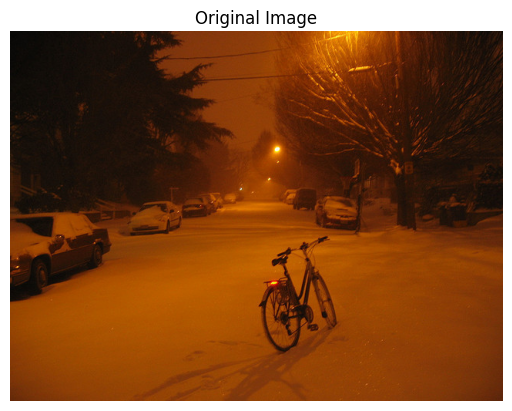

In [5]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("assets/Image2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

# Show the original image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

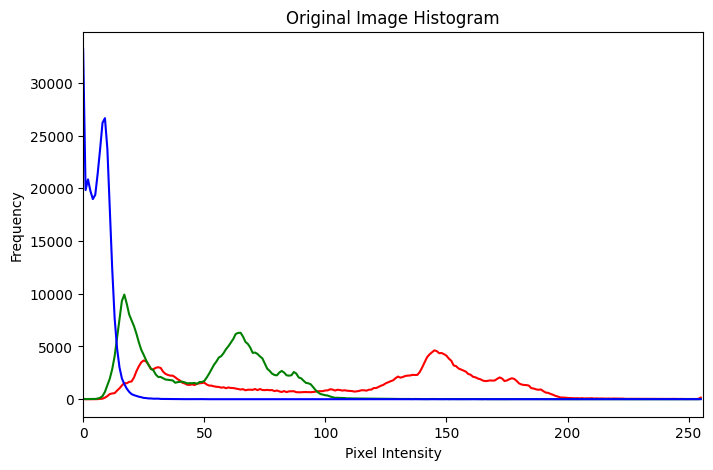

In [6]:
# Function to plot histograms for each color channel
def plot_histogram(image, title="Histogram"):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(8,5))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Plot original histograms
plot_histogram(img_rgb, "Original Image Histogram")


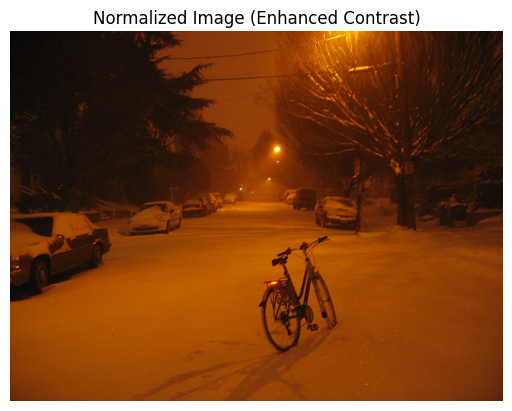

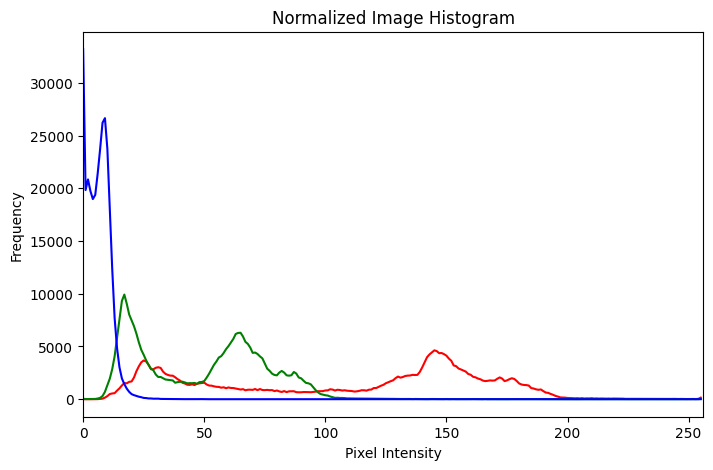

In [7]:
# Normalize the image
normalized_img = np.zeros_like(img_rgb)
normalized_img = cv2.normalize(img_rgb, normalized_img, 0, 255, cv2.NORM_MINMAX)

# Show the normalized image
plt.imshow(normalized_img)
plt.title("Normalized Image (Enhanced Contrast)")
plt.axis("off")
plt.show()

# Plot histogram of normalized image
plot_histogram(normalized_img, "Normalized Image Histogram")


## Conclusion

- **Color histograms** provide a clear way to analyze the intensity distribution of each channel.
- **Normalization** enhances contrast by stretching pixel values to cover the full intensity range.
- This technique is especially useful in image preprocessing for computer vision tasks where visibility and detail are important.

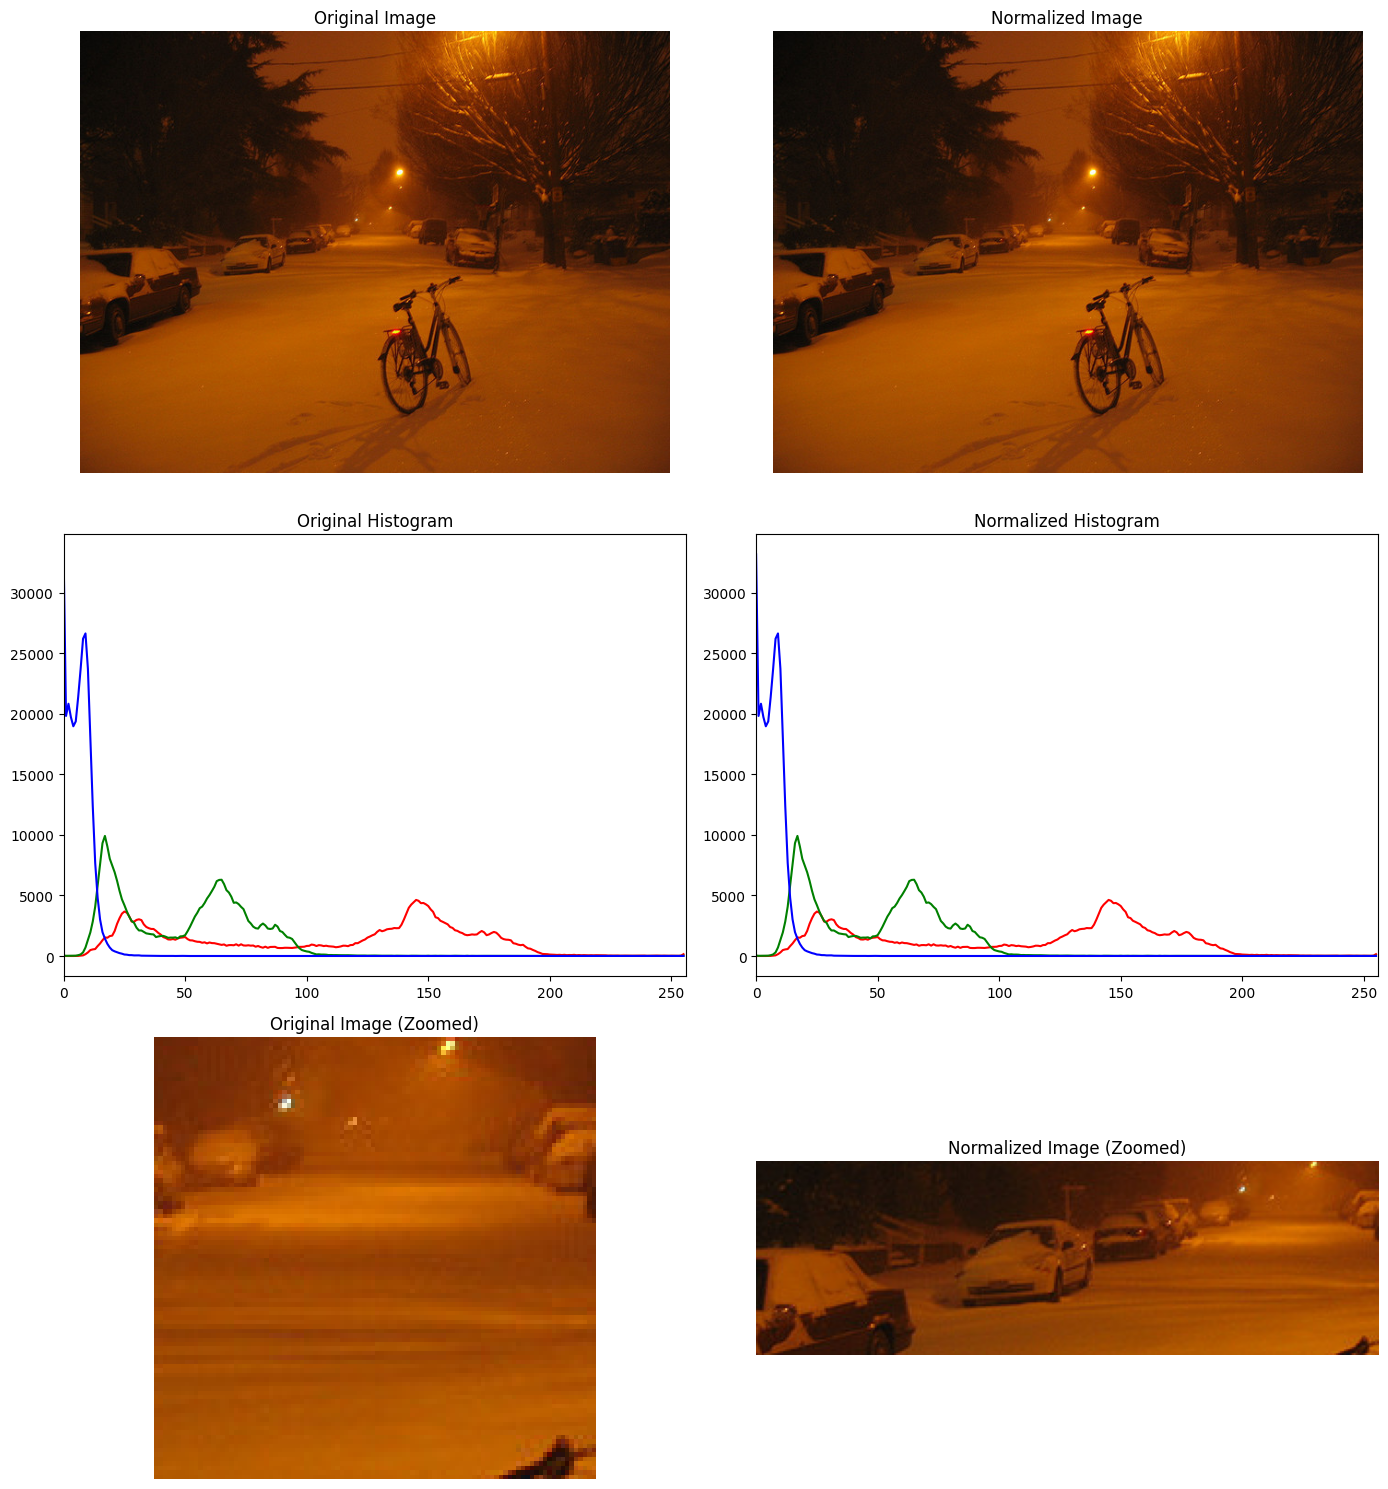

In [8]:
# Combined visualization: Images, Histograms, and Zoomed-in Details
h, w, _ = img_rgb.shape
crop_size = 50  # pixels
center_h, center_w = h//2, w//2

# Crop regions for detail
original_crop = img_rgb[center_h-crop_size:center_h+crop_size,
                        center_w-crop_size:center_w+crop_size]
normalized_crop = normalized_img[center_h-crop_size:center_h+crop_size,
                                 center_w-center_w+crop_size:center_w+crop_size]

# Create figure with 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14,15))

# Row 1: Full images
axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Original Image")
axes[0,0].axis("off")

axes[0,1].imshow(normalized_img)
axes[0,1].set_title("Normalized Image")
axes[0,1].axis("off")

# Row 2: Histograms
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
    axes[1,0].plot(hist, color=col)
axes[1,0].set_title("Original Histogram")
axes[1,0].set_xlim([0,256])

for i, col in enumerate(color):
    hist = cv2.calcHist([normalized_img], [i], None, [256], [0,256])
    axes[1,1].plot(hist, color=col)
axes[1,1].set_title("Normalized Histogram")
axes[1,1].set_xlim([0,256])

# Row 3: Zoomed details
axes[2,0].imshow(original_crop)
axes[2,0].set_title("Original Image (Zoomed)")
axes[2,0].axis("off")

axes[2,1].imshow(normalized_crop)
axes[2,1].set_title("Normalized Image (Zoomed)")
axes[2,1].axis("off")

plt.tight_layout()
plt.show()

## Grayscale Histogram Normalization with Pixel Intensity Manipulation

In this section, we will:
1. Convert the color image into **grayscale**.
2. Display its **pixel intensity matrix**.
3. Add **+50 intensity** to every pixel value (brightening the image). -> **(cv2.add = increase | cv2.subtract = decrease)**
4. Apply **histogram normalization** to bring the contrast back into balance.
5. Compare all results visually and numerically.


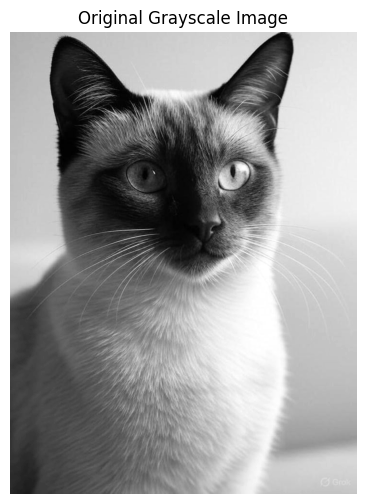

Original Pixel Matrix:
[[173 173 173 ... 228 228 228]
 [173 173 173 ... 228 228 228]
 [174 174 174 ... 228 228 228]
 ...
 [ 41  41  40 ... 198 198 198]
 [ 41  41  40 ... 197 197 197]
 [ 42  41  41 ... 197 197 197]]


In [9]:
# Load and convert to grayscale
gray = cv2.imread("assets/Image.jpeg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

print("Original Pixel Matrix:")
print(gray)

### Step 1: Increase Pixel Values by +50

We'll manually add 50 to all pixel intensities to simulate an overexposed (too bright) image.
Values exceeding 255 will be **clipped** to the maximum valid intensity (255).


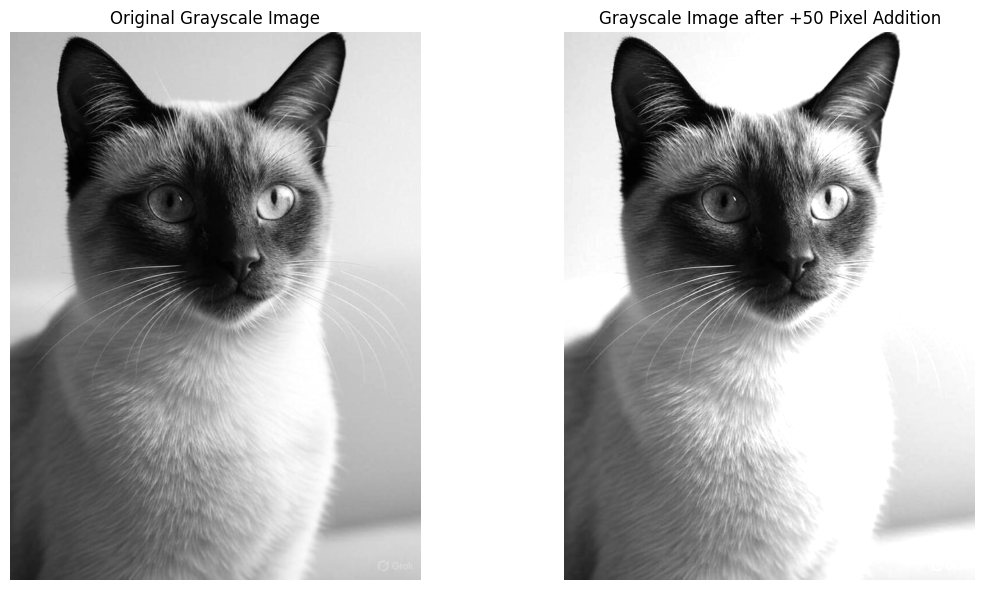

Original Pixel Matrix:
[[173 173 173 ... 228 228 228]
 [173 173 173 ... 228 228 228]
 [174 174 174 ... 228 228 228]
 ...
 [ 41  41  40 ... 198 198 198]
 [ 41  41  40 ... 197 197 197]
 [ 42  41  41 ... 197 197 197]]

Pixel Matrix after +50 Addition:
[[223 223 223 ... 255 255 255]
 [223 223 223 ... 255 255 255]
 [224 224 224 ... 255 255 255]
 ...
 [ 91  91  90 ... 248 248 248]
 [ 91  91  90 ... 247 247 247]
 [ 92  91  91 ... 247 247 247]]


In [10]:
# Add 50 to all pixels (simulate brightness increase)
brighter = cv2.add(gray, 50)  # Automatically clips values > 255

# Show side-by-side comparison with the original grayscale image
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

axes[1].imshow(brighter, cmap='gray')
axes[1].set_title("Grayscale Image after +50 Pixel Addition")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Display pixel matrices
print("Original Pixel Matrix:")
print(gray)
print("\nPixel Matrix after +50 Addition:")
print(brighter)


### Step 2: Histogram Normalization

Now we normalize the brightened image so that its pixel values spread evenly across the full intensity range (0–255).  
This restores the contrast lost due to overexposure.


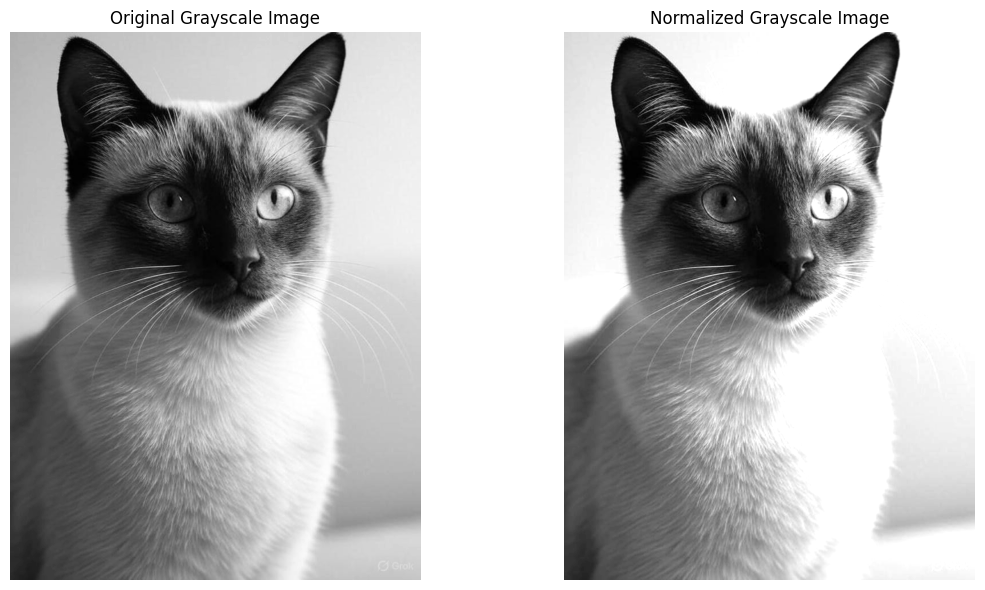

Original Pixel Matrix:
[[173 173 173 ... 228 228 228]
 [173 173 173 ... 228 228 228]
 [174 174 174 ... 228 228 228]
 ...
 [ 41  41  40 ... 198 198 198]
 [ 41  41  40 ... 197 197 197]
 [ 42  41  41 ... 197 197 197]]

Normalized Pixel Matrix:
[[215 215 215 ... 255 255 255]
 [215 215 215 ... 255 255 255]
 [216 216 216 ... 255 255 255]
 ...
 [ 51  51  50 ... 246 246 246]
 [ 51  51  50 ... 245 245 245]
 [ 52  51  51 ... 245 245 245]]


In [11]:
# Normalize the image
normalized = np.zeros_like(brighter)
normalized = cv2.normalize(brighter, normalized, 0, 255, cv2.NORM_MINMAX)

# Show normalized result side-by-side with original grayscale
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

axes[1].imshow(normalized, cmap='gray')
axes[1].set_title("Normalized Grayscale Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Display pixel matrices
print("Original Pixel Matrix:")
print(gray)
print("\nNormalized Pixel Matrix:")
print(normalized)


### Step 3: Compare Histograms

Let's plot the histograms of:
- Original grayscale image
- Brightened image (+50)
- Normalized image


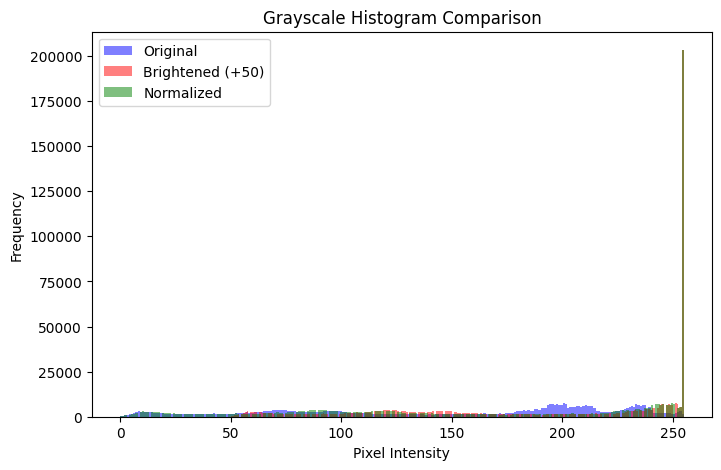

In [12]:
# Plot histograms
plt.figure(figsize=(8,5))
plt.hist(gray.ravel(), bins=256, color='blue', alpha=0.5, label='Original')
plt.hist(brighter.ravel(), bins=256, color='red', alpha=0.5, label='Brightened (+50)')
plt.hist(normalized.ravel(), bins=256, color='green', alpha=0.5, label='Normalized')
plt.legend()
plt.title("Grayscale Histogram Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


## 🧠 Interpretation

- After adding **+50**, most pixel values shifted toward the bright region (right side of the histogram), reducing contrast.
- After **normalization**, the histogram stretches again across 0–255, restoring contrast and improving visibility of details.


## RGB Histogram Normalization with Pixel Intensity Manipulation

In this section, we will:
1. Convert the color image into **RGB**.
2. Display its **pixel intensity matrix**.
3. Add **+50 intensity** to every pixel value -> **(cv2.add = increase | cv2.subtract = decrease)**
4. Apply **histogram normalization** to bring the contrast back into balance.
5. Compare all results visually and numerically.


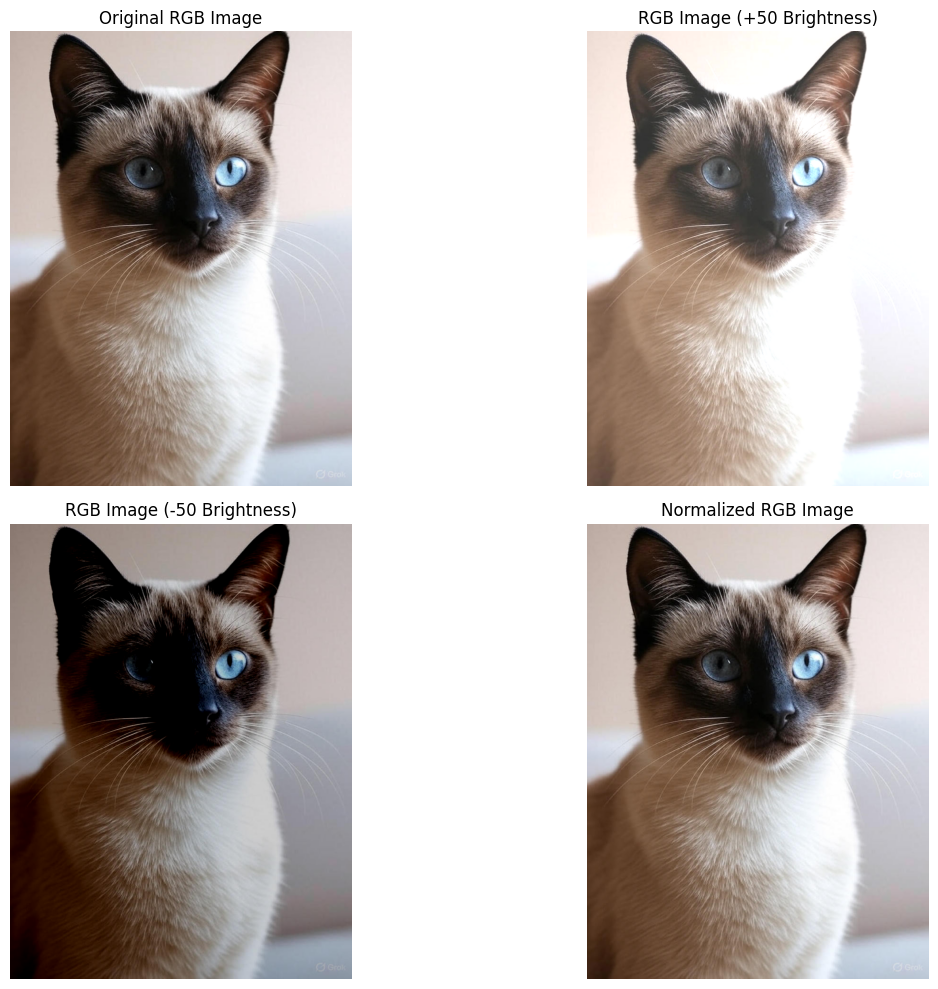

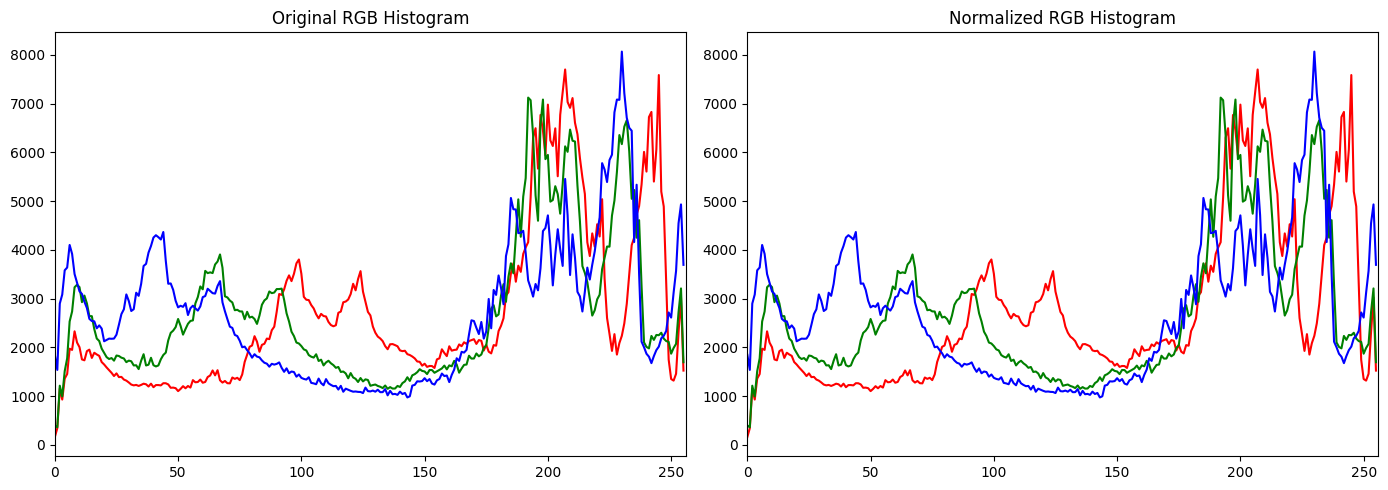

Original RGB Pixel Sample (top-left 5x5 region):
[[[186 169 161]
  [186 169 161]
  [186 169 161]
  [186 169 161]
  [186 169 161]]

 [[186 169 161]
  [186 169 161]
  [186 169 161]
  [186 169 161]
  [186 169 161]]

 [[187 170 162]
  [187 170 162]
  [187 170 162]
  [187 170 162]
  [187 170 162]]

 [[187 170 162]
  [187 170 162]
  [187 170 162]
  [187 170 162]
  [187 170 162]]

 [[187 170 162]
  [187 170 162]
  [187 170 162]
  [187 170 162]
  [187 170 162]]]

Brighter (+50) RGB Pixel Sample:
[[[236 219 211]
  [236 219 211]
  [236 219 211]
  [236 219 211]
  [236 219 211]]

 [[236 219 211]
  [236 219 211]
  [236 219 211]
  [236 219 211]
  [236 219 211]]

 [[237 220 212]
  [237 220 212]
  [237 220 212]
  [237 220 212]
  [237 220 212]]

 [[237 220 212]
  [237 220 212]
  [237 220 212]
  [237 220 212]
  [237 220 212]]

 [[237 220 212]
  [237 220 212]
  [237 220 212]
  [237 220 212]
  [237 220 212]]]

Darker (-50) RGB Pixel Sample:
[[[136 119 111]
  [136 119 111]
  [136 119 111]
  [136 119 111]
 

In [13]:
# 🧩 RGB Histogram Normalization and Brightness Adjustment
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
img_rgb = cv2.imread("assets/Image.jpeg")
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# --- Step 1: Brightness adjustment ---
# Add 50 to all RGB channels (brighter)
brighter_rgb = cv2.add(img_rgb, (50, 50, 50, 0))

# Subtract 50 from all RGB channels (darker)
darker_rgb = cv2.subtract(img_rgb, (50, 50, 50, 0))

# --- Step 2: Normalization ---
# Normalize pixel intensities to full 0–255 range
normalized_rgb = np.zeros_like(img_rgb)
normalized_rgb = cv2.normalize(img_rgb, normalized_rgb, 0, 255, cv2.NORM_MINMAX)

# --- Step 3: Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Original RGB Image")
axes[0,0].axis("off")

axes[0,1].imshow(brighter_rgb)
axes[0,1].set_title("RGB Image (+50 Brightness)")
axes[0,1].axis("off")

axes[1,0].imshow(darker_rgb)
axes[1,0].set_title("RGB Image (-50 Brightness)")
axes[1,0].axis("off")

axes[1,1].imshow(normalized_rgb)
axes[1,1].set_title("Normalized RGB Image")
axes[1,1].axis("off")

plt.tight_layout()
plt.show()

# --- Step 4: Histogram Comparison ---
colors = ('r', 'g', 'b')
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Original Histogram
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
    axes[0].plot(hist, color=col)
axes[0].set_title("Original RGB Histogram")
axes[0].set_xlim([0,256])

# Normalized Histogram
for i, col in enumerate(colors):
    hist = cv2.calcHist([normalized_rgb], [i], None, [256], [0,256])
    axes[1].plot(hist, color=col)
axes[1].set_title("Normalized RGB Histogram")
axes[1].set_xlim([0,256])

plt.tight_layout()
plt.show()

# --- Step 5: Pixel Matrix Samples ---
print("Original RGB Pixel Sample (top-left 5x5 region):")
print(img_rgb[:5, :5, :])

print("\nBrighter (+50) RGB Pixel Sample:")
print(brighter_rgb[:5, :5, :])

print("\nDarker (-50) RGB Pixel Sample:")
print(darker_rgb[:5, :5, :])

print("\nNormalized RGB Pixel Sample:")
print(normalized_rgb[:5, :5, :])
